# Plot simulation data

Copyright (c) 2024 University of Strasbourg\
Author: Massyl Moudoud <mmoudoud@unistra.fr> \
Contributor(s) : Céline Meillier <meillier@unistra.fr>, Vincent Mazet <vincent.mazet@unistra.fr>

This work has been supported by the ANR project DynaSTI: ANR-22-CE45-0008

This software is governed by the CeCILL  license under French law and
abiding by the rules of distribution of free software.  You can  use, 
modify and/ or redistribute the software under the terms of the CeCILL
license as circulated by CEA, CNRS and INRIA at the following URL
"http://www.cecill.info". 

As a counterpart to the access to the source code and  rights to copy,
modify and redistribute granted by the license, users are provided only
with a limited warranty  and the software's author,  the holder of the
economic rights,  and the successive licensors  have only  limited
liability. 

In this respect, the user's attention is drawn to the risks associated
with loading,  using,  modifying and/or developing or reproducing the
software by the user in light of its specific status of free software,
that may mean  that it is complicated to manipulate,  and  that  also
therefore means  that it is reserved for developers  and  experienced
professionals having in-depth computer knowledge. Users are therefore
encouraged to load and test the software's suitability as regards their
requirements in conditions enabling the security of their systems and/or 
data to be ensured and,  more generally, to use and operate it in the 
same conditions as regards security. 

The fact that you are presently reading this means that you have had
knowledge of the CeCILL license and that you accept its terms.

In [1]:
# If you have a valid latex install set to True
# to render figure legends and labels in Latex style
use_Latex = False

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set paths
import pathlib
try:
    script_path = str(pathlib.Path(__file__).parent.resolve()) +"/"
except NameError:
    script_path = ""

In [4]:
# Check is latex is used# Check is latex is used
if use_Latex:
    plt.rcParams.update({'font.size': 50,  'text.usetex' : True, 'font.family':"ptm"})
else:
    plt.rcParams.update({'font.size': 50})

# Define general properties

In [5]:
#Number of ROIs
R = 10 
#Assign names to the ROIs (just numbers)
ROI_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#Number of time samples
T = 1000

FCU_list = ["1" , "1a", "1b" , "2" , "2a" , "2b" ]

# Compute C

In [6]:
path = script_path + "../data/simulation/simulation_A_D_2024_12_18.npz"

data  = np.load(path)
D = data["D"]
A = data["A"]

E, P = D.shape
T = A.shape[1]

In [7]:
C = D@A

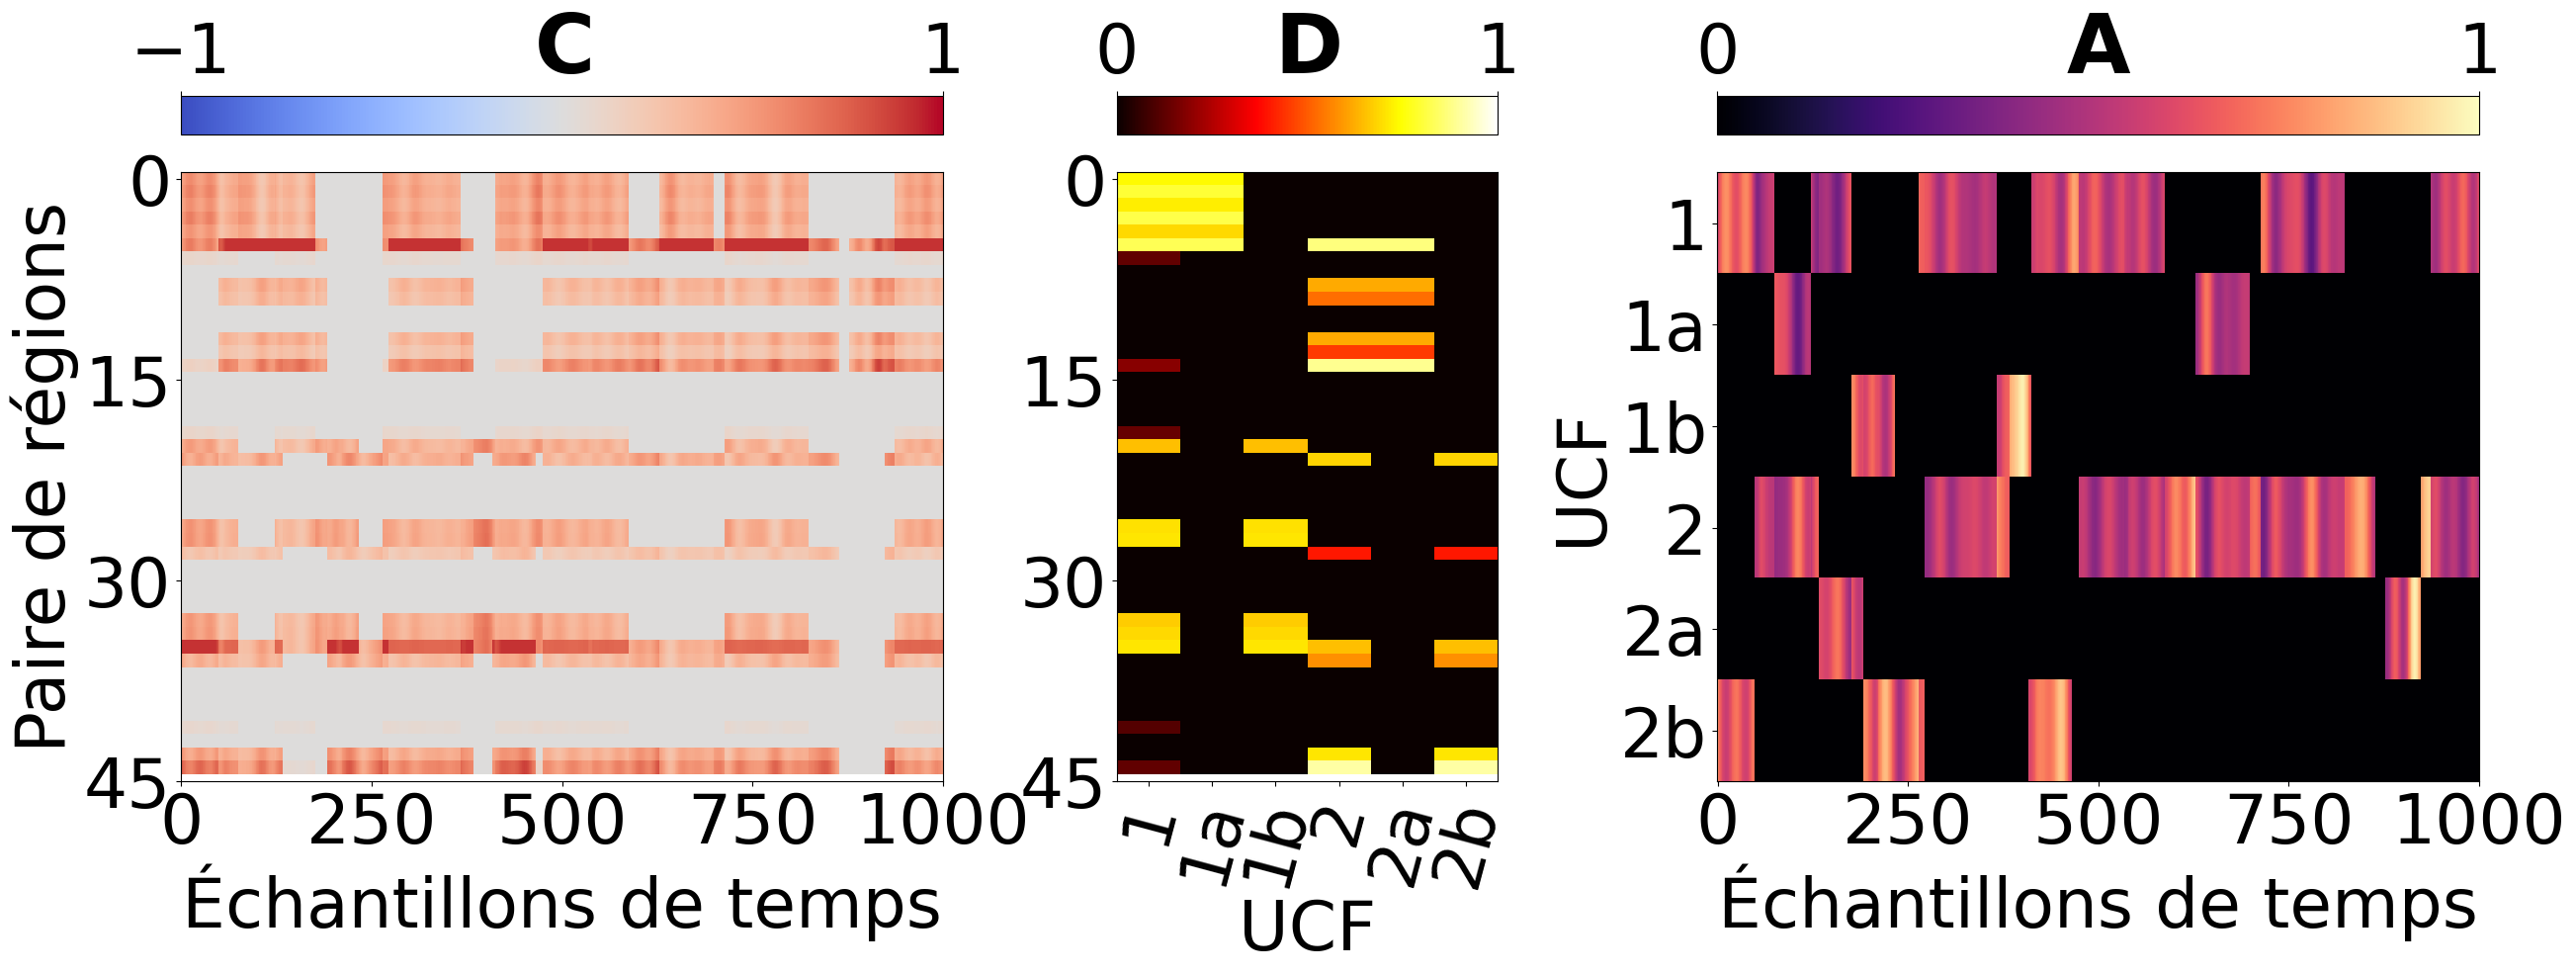

In [8]:
f, (a0,a3, a1, a4, a2) = plt.subplots(1, 5, gridspec_kw={'width_ratios': [5,0.1, 2.5, 0.4, 5]} , figsize =(30, 10))

a3.axis('off')
a4.axis('off')


imC = a0.imshow(C, aspect = 'auto', interpolation = 'nearest', cmap = 'coolwarm', vmin = -1, vmax = 1)
a0.set_ylabel("Paire de régions")
a0.set_xlabel("Échantillons de temps")
a0.set_title(r"$\mathbf{C}$", y = 1.15)
a0.set_xticks([0, 250, 500, 750, 1000])
f.colorbar(imC ,ax=[a0],location='top', ticks =[-1, 1])#, label = "Corrélation")
a0.set_yticks([0, 15, 30, 45])

imD = a1.imshow(D, aspect = 'auto', interpolation = 'nearest', cmap = 'hot',  vmin = 0, vmax = 1)
#a1.grid(False)
f.colorbar(imD,ax=[a1],location='top', ticks =[0, 1],  aspect= 10)
a1.set_xticks(np.arange(P) , FCU_list ,rotation =75);
a1.set_xlabel("UCF")
a1.set_title(r"$\mathbf{D}$", y = 1.15)
#a1.set_ylabel("ROI pair")
a1.set_yticks([0, 15, 30, 45])

imA = a2.imshow(A, aspect = "auto", interpolation = 'nearest', cmap = 'magma',  vmin = 0, vmax = 1)
a2.set_yticks(np.arange(P) , FCU_list )
a2.set_ylabel("UCF")
a2.set_xlabel("Échantillons de temps")
a2.set_title(r"$\mathbf{A}$", y = 1.15)
a2.set_xticks([0, 250, 500, 750, 1000])
#a2.grid(False)
f.colorbar(imA,ax=[a2],location='top', ticks =[0, 1])#, label ="Amplitude" )


plt.savefig(script_path+"figs/Figure1.pdf",  bbox_inches='tight')

# If in script close the figures
if script_path != "":
    plt.close("all")